# inverting them 코랩 환경 포팅
https://github.com/saketd403/Understanding-Deep-Image-Representations-by-Inverting-Them

In [ ]:
# 텐서플로 1로 작성되어 버전 1 선택
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
! git clone https://github.com/saketd403/Understanding-Deep-Image-Representations-by-Inverting-Them.git
% cd ./Understanding-Deep-Image-Representations-by-Inverting-Them/

fatal: destination path 'Understanding-Deep-Image-Representations-by-Inverting-Them' already exists and is not an empty directory.
/content/Understanding-Deep-Image-Representations-by-Inverting-Them


# Inversion of ConvNet for MNIST dataset

In [ ]:
# Import necessary libraries.
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [ ]:
mnist=keras.datasets.mnist
(x_train,y_train), (x_test,y_test)=mnist.load_data()

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28,1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28,1).astype('float32')
x_train=x_train/255.0
x_test=x_test/255.0
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [ ]:
tf.set_random_seed(1)

In [ ]:
kernels_1,bias_1=pickle.load(open(r"layers to load/layer_0.pkl","rb"))
kernels_2,bias_2=pickle.load(open(r"layers to load/layer_2.pkl","rb"))
kernels_3,bias_3=pickle.load(open(r"layers to load/layer_4.pkl","rb"))
kernels_4,bias_4=pickle.load(open(r"layers to load/layer_6.pkl","rb"))

In [ ]:
'''
layer_name = 'conv2d_28'
intermediate_layer_model = keras.Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(x_train[0].reshape(1,28,28,1))
'''

"\nlayer_name = 'conv2d_28'\nintermediate_layer_model = keras.Model(inputs=model.input,\n                                 outputs=model.get_layer(layer_name).output)\nintermediate_output = intermediate_layer_model.predict(x_train[0].reshape(1,28,28,1))\n"

In [ ]:
image_shape=(1,28,28,1)
X=tf.Variable(tf.zeros(image_shape))
conv1=tf.layers.conv2d(inputs=X,filters=4,kernel_size=[6, 6],padding="same",strides=(1,1),activation=tf.nn.relu,
    kernel_initializer=tf.constant_initializer(kernels_1),bias_initializer=tf.constant_initializer(bias_1),trainable=False)

avg_pool1=tf.layers.average_pooling2d(inputs=conv1, pool_size=[5, 5],padding="valid", strides=(1,1))

conv2=tf.layers .conv2d(inputs=avg_pool1,filters=8,kernel_size=[4, 4],padding="same",strides=(1,1),activation=tf.nn.relu,
    kernel_initializer=tf.constant_initializer(kernels_2),bias_initializer=tf.constant_initializer(bias_2),trainable=False)

Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.AveragePooling2D instead.


In [ ]:
# Obtain the feature maps of second convolutional layer.
# X0=pickle.load(open(r"\second_conv.pkl","rb"))

with open('./layers to load/second_conv.pkl', 'rb') as f:
  X0 = pickle.load(f) # 단 한줄씩 읽어옴

In [ ]:
# Configure the loss  to be minimized.Read research paper for more details on this
l2_loss = tf.norm(X0-conv2, 'euclidean')/tf.norm(X0,'euclidean')

total_variation_loss = tf.reduce_sum(tf.image.total_variation(tf.convert_to_tensor(x_train[0]+X)))
sigma_tv = 5e-7
loss = l2_loss + sigma_tv*total_variation_loss

In [ ]:
train_step=tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss)

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #print(sess.run(X[0][0][0][0]))
    for i in range(100000):
        _, loss_value = sess.run([train_step,loss])
        
        if i % 10000 == 0:
            #print(sess.run(X[0][0][0][0]))
            print("Loss: ", loss_value)
    #print(sess.run(X))
    # Get the image after the iterations
    O=sess.run(X)

Loss:  0.966622
Loss:  0.00096049753
Loss:  0.0009482815
Loss:  0.00094224914
Loss:  0.0009481103
Loss:  0.000945649
Loss:  0.0009270307
Loss:  0.0009465093
Loss:  0.0009321248
Loss:  0.00095077045


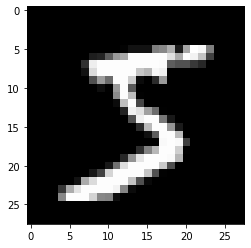

In [ ]:
# Original image
plt.imshow(x_train[0].reshape(28,28),cmap="gray")
plt.show()

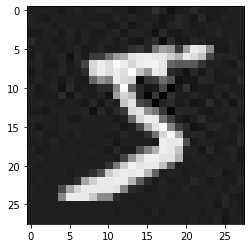

In [ ]:
# Reconstructed image
Ot=O.reshape(28,28)
plt.imshow(Ot,cmap="gray")
plt.show()